# Connection to AWS Redshift

In [ ]:
!pip install "redshift_connector[full]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import redshift_connector

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
conn = redshift_connector.connect(
    host='cspc-workgroup.783764604578.us-west-2.redshift-serverless.amazonaws.com',
    database='cspc5071-dsa',
    port=5439,
    user='python_user',
    password='Database123!' # Not best practice but who cares :))
 )
cursor = conn.cursor()

In [ ]:
# Query to get the list of tables in the specified schema
query = f"""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
AND table_type = 'BASE TABLE';
"""

cursor.execute(query)
tables = cursor.fetchall()

print(f"Tables in schema public:")
for table in tables:
    print(table[0]) # These are all the data we have in AWS redshift. I'm getting infinite loading screen, so I wanted to just see

Tables in schema public:
average_egg_price
us_national_outbreaks
h5n1_outbreaks
us_national_disaster


# Data preprocessing - Price Data (Dan)

In [ ]:
query = """SELECT * FROM "average_egg_price";
"""
cursor.execute(query)
df_egg_price : pd.DataFrame = cursor.fetch_dataframe()

In [ ]:
df_egg_price['observation_date'] = pd.to_datetime(df_egg_price['observation_date'])
df_egg_price['date'] = df_egg_price['observation_date'].dt.to_period('M')

In [ ]:
df_egg_price

,observation_date,price_per_dozen,date
0,1980-01-01,0.879,1980-01
1,1980-02-01,0.774,1980-02
2,1980-03-01,0.812,1980-03
3,1980-04-01,0.797,1980-04
4,1980-05-01,0.737,1980-05
...,...,...,...
536,2024-09-01,3.821,2024-09
537,2024-10-01,3.370,2024-10
538,2024-11-01,3.649,2024-11
539,2024-12-01,4.146,2024-12


from matplotlib import pyplot as plt
df_egg_price['price_per_dozen'].plot(kind='hist', bins=20, title='price_per_dozen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['observation_date']
  ys = series['price_per_dozen']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_egg_price.sort_values('observation_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('observation_date')
_ = plt.ylabel('price_per_dozen')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['observation_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'observation_date'}, axis=1)
              .sort_values('observation_date', ascending=True))
  xs = counted['observation_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_egg_price.sort_values('observation_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('observation_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['observation_date']
  ys = series['price_per_dozen']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_egg_price.sort_values('observation_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('observation_date')
_ = plt.ylabel('price_per_dozen')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['observation_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'observation_date'}, axis=1)
              .sort_values('observation_date', ascending=True))
  xs = counted['observation_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_egg_price.sort_values('observation_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('observation_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_egg_price['price_per_dozen'].plot(kind='line', figsize=(8, 4), title='price_per_dozen')
plt.gca().spines[['top', 'right']].set_visible(False)

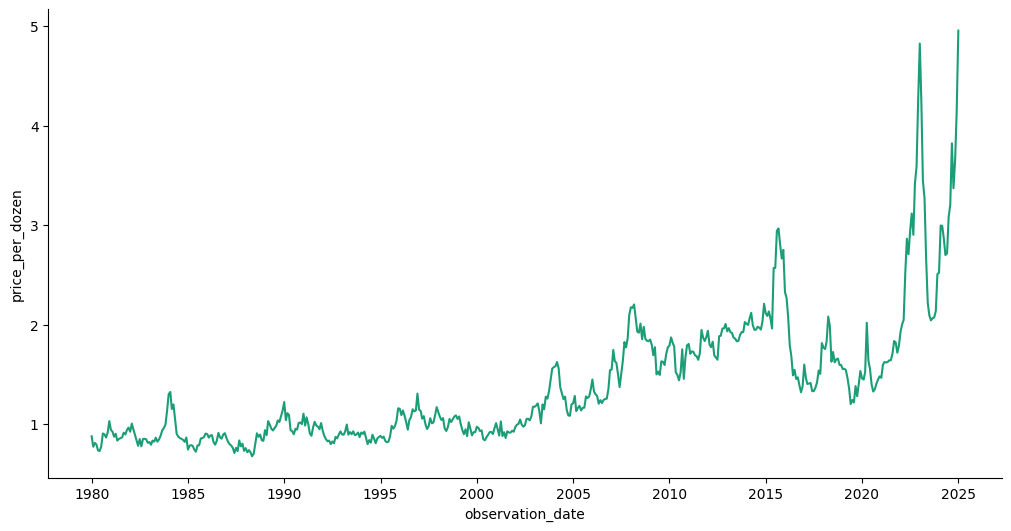

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['observation_date']
  ys = series['price_per_dozen']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_egg_price.sort_values('observation_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('observation_date')
_ = plt.ylabel('price_per_dozen')

# Data preprocessing - Human Disease Outbreak (Dan)

## US diseases excluding pandemics

In [ ]:
query = """SELECT year, month, primary_mode, etiology, illnesses, food_vehicle, animal_type FROM "cspc5071-dsa"."public"."us_national_outbreaks";
"""
cursor.execute(query)
df_us_outbreaks : pd.DataFrame = cursor.fetch_dataframe()

In [ ]:
df_us_outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66709 entries, 0 to 66708
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          66709 non-null  int64 
 1   month         66709 non-null  int64 
 2   primary_mode  66709 non-null  object
 3   etiology      66709 non-null  object
 4   illnesses     66709 non-null  int64 
 5   food_vehicle  66709 non-null  object
 6   animal_type   66709 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.6+ MB


In [ ]:
df_us_outbreaks['date'] = df_us_outbreaks['year'].astype(str) + '-' + df_us_outbreaks['month'].astype(str)

In [ ]:
df_us_outbreaks['datetime'] = pd.to_datetime(df_us_outbreaks['date'], format='%Y-%m', errors='coerce')
df_us_outbreaks['date'] = df_us_outbreaks['datetime'].dt.to_period('M')

In [ ]:
df_us_outbreaks_grouped = df_us_outbreaks.groupby('date', as_index=False).agg(
    us_human_outbreaks_cnt = pd.NamedAgg(column='illnesses', aggfunc='count'),
    us_human_illnesses_cnt = pd.NamedAgg(column='illnesses', aggfunc='sum')
)

## Pandemics



*   2002-2004 SARS
*   2009-2010 Swine Flu
*   2012-Present Mers
*   2019-Present Covid-19





In [ ]:
# Covid Hospitalization
query = """SELECT * FROM "cspc5071-dsa"."public"."covid_hospitalization";"""
cursor.execute(query)
df_covid : pd.DataFrame = cursor.fetch_dataframe()

ProgrammingError: {'S': 'ERROR', 'C': '42501', 'M': 'permission denied for relation covid_hospitalization', 'F': '/opt/brazil-pkg-cache/packages/RedshiftPADB/RedshiftPADB-1.0.7910.0/AL2_aarch64/generic-flavor/src/src/pg/src/backend/catalog/aclchk.c', 'L': '3589', 'R': 'aclcheck_error'}

In [ ]:
df_covid

,full_geo_name,fips_code,county,state,outbreak_date,flock_type,flock_size,state_count,outbreaks,counties


# Data preprocessing - Natural Disaster (Sung)

In [ ]:
query = """SELECT * FROM "cspc5071-dsa"."public"."us_national_disaster";
"""
cursor.execute(query)
df_us_disasters : pd.DataFrame = cursor.fetch_dataframe()

copied_df = df_us_disasters.copy() # creating a deep copy so I don't have to fetch the database all the time

In [ ]:
df_us_disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               403 non-null    object 
 1   disaster_type      403 non-null    object 
 2   start_date         403 non-null    object 
 3   end_date           403 non-null    object 
 4   cpi_adjsuted_cost  403 non-null    float64
 5   unadjusted_cost    403 non-null    float64
 6   deaths             403 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 22.2+ KB


In [ ]:
# Changing date in format of 'YYYYMMDD' to 'YYYY-MM'
from datetime import datetime

df_us_disasters['start_date'] = pd.to_datetime(df_us_disasters['start_date'].astype(str), format='%Y%m%d').dt.strftime('%Y-%m')
df_us_disasters['end_date'] = pd.to_datetime(df_us_disasters['end_date'].astype(str), format='%Y%m%d').dt.strftime('%Y-%m')

In [ ]:
df_us_disasters.head()

,name,disaster_type,start_date,end_date,cpi_adjsuted_cost,unadjusted_cost,deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04,1980-04,2749.399902,706.799988,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08,1980-08,2236.199951,590.000000,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06,1980-11,40681.199219,10020.000000,1260
3,Florida Freeze (January 1981),Freeze,1981-01,1981-01,2076.399902,572.000000,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05,1981-05,1409.099976,401.399994,20


In [ ]:
def expand_date_range(row):
    date_range = pd.date_range(row["start_date"], row["end_date"], freq="MS").strftime("%Y-%m")
    num_months = len(date_range)

    return pd.DataFrame({
        "name": row["name"],
        "disaster_type": row["disaster_type"],
        "date": date_range,
        "cpi_adjusted_cost": row["cpi_adjsuted_cost"] / num_months,
        "unadjusted_cost": row["unadjusted_cost"] / num_months,
        "deaths": row["deaths"] / num_months
    })

df_us_disasters = pd.concat(df_us_disasters.apply(expand_date_range, axis=1).to_list(), ignore_index=True)
df_us_disasters.head(10)

,name,disaster_type,date,cpi_adjusted_cost,unadjusted_cost,deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04,2749.399902,706.799988,7.0
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08,2236.199951,590.000000,13.0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06,6780.199870,1670.000000,210.0
3,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-07,6780.199870,1670.000000,210.0
4,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-08,6780.199870,1670.000000,210.0
5,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-09,6780.199870,1670.000000,210.0
6,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-10,6780.199870,1670.000000,210.0
7,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-11,6780.199870,1670.000000,210.0
8,Florida Freeze (January 1981),Freeze,1981-01,2076.399902,572.000000,0.0
9,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05,1409.099976,401.399994,20.0


In [ ]:
df_us_disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               754 non-null    object 
 1   disaster_type      754 non-null    object 
 2   date               754 non-null    object 
 3   cpi_adjusted_cost  754 non-null    float64
 4   unadjusted_cost    754 non-null    float64
 5   deaths             754 non-null    float64
dtypes: float64(3), object(3)
memory usage: 35.5+ KB


## Statistics

In [ ]:
print(df_us_disasters.describe())

       cpi_adjusted_cost  unadjusted_cost       deaths
count         754.000000       754.000000   754.000000
mean         3868.517369      2732.225072    22.437666
std         12982.182295      9769.737817   132.695852
min           194.400004       120.833333     0.000000
25%           850.158366       500.533325     0.000000
50%          1542.400024      1000.930589     3.000000
75%          2649.550049      1917.149963    12.375000
max        201297.500000    125029.500000  2981.000000


## EDA

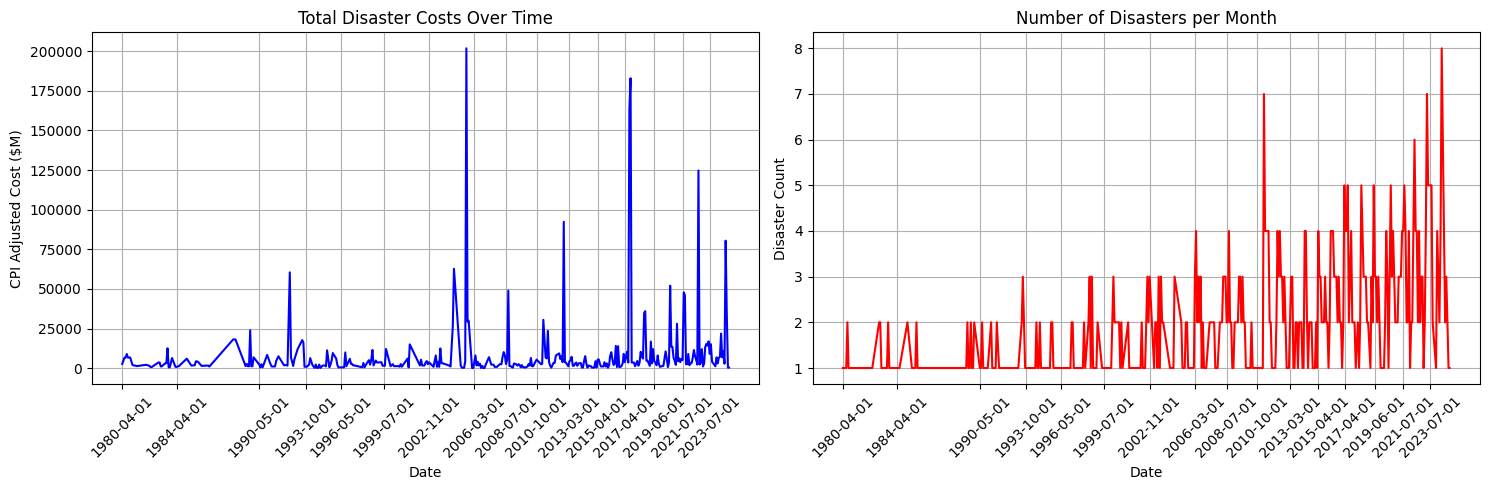

In [ ]:
monthly_cost = df_us_disasters.groupby("date")["cpi_adjusted_cost"].sum()  # Total Disaster Costs Over Time
monthly_disasters = df_us_disasters.groupby("date")["name"].count() # Count number of disasters per month

monthly_cost.index = pd.to_datetime(monthly_cost.index)
monthly_disasters.index = pd.to_datetime(monthly_disasters.index)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Total Disaster Costs Over Time
axes[0].plot(monthly_cost, label="Total Cost", color="b")
axes[0].set_title("Total Disaster Costs Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("CPI Adjusted Cost ($M)")
axes[0].set_xticks(monthly_cost.index[::18])
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid()

# Number of Disasters per Month
axes[1].plot(monthly_disasters, label="Disaster Count", color="r")
axes[1].set_title("Number of Disasters per Month")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Disaster Count")
axes[1].set_xticks(monthly_disasters.index[::24])
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid()

plt.tight_layout()
plt.show()

<ipython-input-58-8ead105c15eb>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-58-8ead105c15eb>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


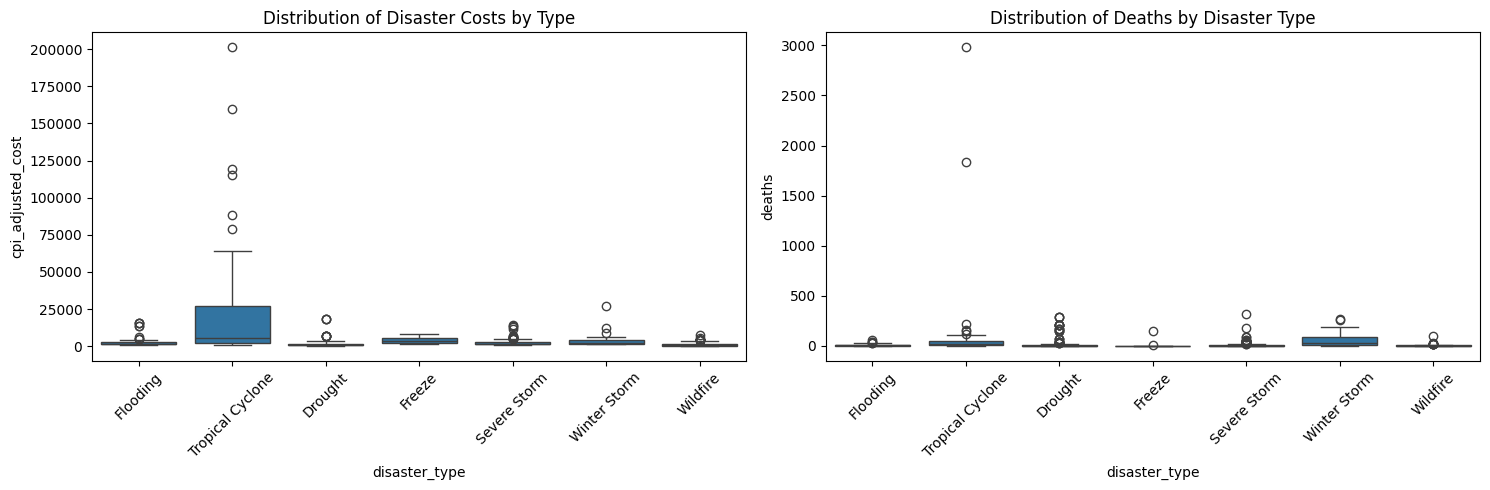

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Cost Distribution by Disaster Type
sns.boxplot(data=df_us_disasters, x="disaster_type", y="cpi_adjusted_cost", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title("Distribution of Disaster Costs by Type")

# Death Distribution by Disaster Type
sns.boxplot(data=df_us_disasters, x="disaster_type", y="deaths", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Distribution of Deaths by Disaster Type")

plt.tight_layout()
plt.show()

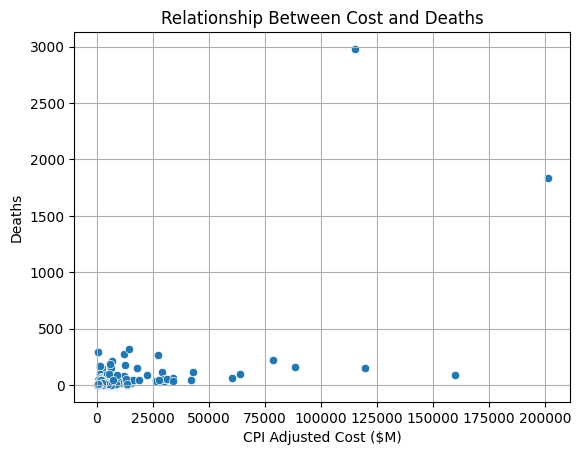

In [ ]:
sns.scatterplot(data=df_us_disasters, x="cpi_adjusted_cost", y="deaths")
plt.title("Relationship Between Cost and Deaths")
plt.xlabel("CPI Adjusted Cost ($M)")
plt.ylabel("Deaths")
plt.grid()
plt.show()

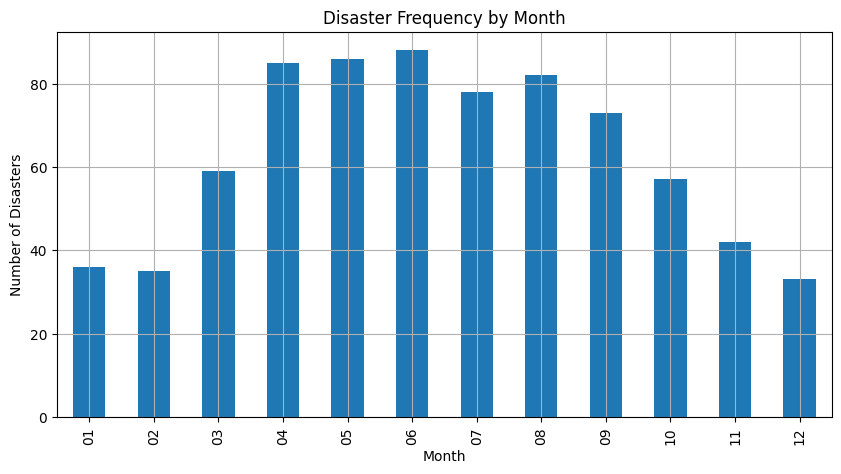

In [ ]:
copy_df = df_us_disasters.copy()

copy_df["month"] = copy_df["date"].str[5:7]  # Extract month
seasonal_counts = copy_df["month"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
seasonal_counts.plot(kind="bar")
plt.title("Disaster Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Number of Disasters")
plt.grid()
plt.show()

## Feature Creation

# Data Preprocessing - H5N1 Outbreak (Chris)

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/

'Colab Notebooks'		  h5n1-flu-reported-cases-filtered.csv	   Resume.gdoc
 commercial-backyard-flocks.csv   h5n1-flu-reported-cases-unfiltered.csv   Resume.pdf
 cs5071project			  images				   TW2
 data-table.csv			 'Resume (1).pdf'			  'Untitled document.gdoc'


In [ ]:
# query = """SELECT * FROM "h5n1_outbreaks";
# """
# cursor.execute(query)
# df_af : pd.DataFrame = cursor.fetch_dataframe()

df_af = pd.read_csv("/content/drive/MyDrive/data-table.csv")
df_af.head()

,FullGeoName,FIPS Codes,County Name,State,Outbreak Date,Flock Type,Flock Size,State Count,Outbreaks,Counties
0,"MI, Jackson",26075,Jackson,Michigan,12-31-2024,WOAH Non-Poultry,9,1,1,1
1,"CA, Riverside",6065,Riverside,California,12-31-2024,Commercial Table Egg Layer; WOAH Non-Poultry; ...,1503370,1,5,1
2,"CA, Butte",6007,Butte,California,12-31-2024,WOAH Non-Poultry; Commercial Raised for Releas...,45890,0,4,1
3,"SD, Miner",46097,Miner,South Dakota,12-31-2024,WOAH Poultry,1500,1,1,1
4,"MI, Ottawa",26139,Ottawa,Michigan,12-31-2024,Commercial Turkey Meat Bird,447700,0,7,1


In [ ]:
df_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FullGeoName    648 non-null    object
 1   FIPS Codes     648 non-null    int64 
 2   County Name    648 non-null    object
 3   State          648 non-null    object
 4   Outbreak Date  648 non-null    object
 5   Flock Type     648 non-null    object
 6   Flock Size     648 non-null    int64 
 7   State Count    648 non-null    int64 
 8   Outbreaks      648 non-null    int64 
 9   Counties       648 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 50.8+ KB


In [ ]:
df_af['Outbreak Date'] = pd.to_datetime(df_af['Outbreak Date'], format='%m-%d-%Y')
df_af['yyyy_mm'] = df_af['Outbreak Date'].dt.strftime('%Y-%m')

In [ ]:
flocks_impacted = df_af.groupby('yyyy_mm').size().reset_index(name='Flock_Count')
flocks_impacted.head()

,yyyy_mm,Flock_Count
0,2022-02,6
1,2022-03,31
2,2022-04,41
3,2022-05,30
4,2022-06,4


In [ ]:
df_af = df_af.merge(flocks_impacted, on='yyyy_mm', how='left')

In [ ]:
flocks_impacted_size = df_af.groupby('yyyy_mm')['Flock Size'].sum().reset_index(name='Total_Flock_Size')
df_af = df_af.merge(flocks_impacted_size, on='yyyy_mm', how='left')

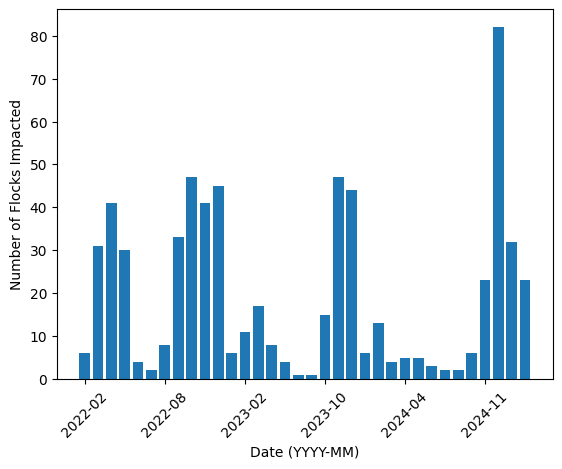

In [ ]:
plt.bar(flocks_impacted['yyyy_mm'], flocks_impacted['Flock_Count'])
tick_positions = flocks_impacted['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Flocks Impacted')
plt.show()

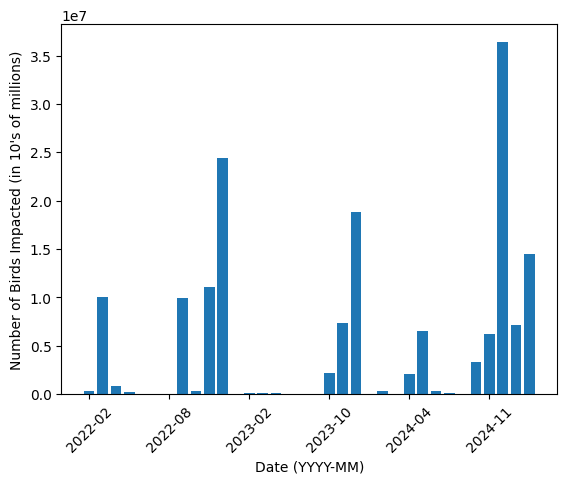

In [ ]:
plt.bar(flocks_impacted_size['yyyy_mm'], flocks_impacted_size['Total_Flock_Size'])
tick_positions = flocks_impacted_size['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Birds Impacted (in 10\'s of millions)')
plt.show()

In [ ]:
human = pd.read_csv('/content/drive/MyDrive/h5n1-flu-reported-cases-unfiltered.csv')
human.head()

,Entity,Code,Day,Human cases with highly pathogenic avian influenza A/H5N1 (monthly)
0,Africa,NaN,1997-01-01,0
1,Africa,NaN,1997-02-01,0
2,Africa,NaN,1997-03-01,0
3,Africa,NaN,1997-04-01,0
4,Africa,NaN,1997-05-01,0


In [ ]:
human['Human cases with highly pathogenic avian influenza A/H5N1 (monthly)'].unique()

array([ 0, 10,  3,  2,  1,  5,  7,  8,  4,  6, 11, 23, 46, 50, 32, 13, 14,
       19, 12,  9, 30, 17, 21, 16, 47, 51, 37])

In [ ]:
human = human[human['Entity'] == 'United States'].copy()
human

,Entity,Code,Day,Human cases with highly pathogenic avian influenza A/H5N1 (monthly),yyyy_mm
9436,United States,USA,1997-01-01,0,1997-01
9437,United States,USA,1997-01-02,0,1997-01
9438,United States,USA,1997-01-03,0,1997-01
9439,United States,USA,1997-01-04,0,1997-01
9440,United States,USA,1997-01-05,0,1997-01
...,...,...,...,...,...
9768,United States,USA,2024-01-09,1,2024-01
9769,United States,USA,2024-01-10,30,2024-01
9770,United States,USA,2024-01-11,13,2024-01
9771,United States,USA,2024-01-12,9,2024-01


In [ ]:
human['Day'] = pd.to_datetime(human['Day'], format = '%Y-%d-%m')
human['yyyy_mm'] = human['Day'].dt.strftime('%Y-%m')

In [ ]:
people_impacted = human.groupby('yyyy_mm')['Human cases with highly pathogenic avian influenza A/H5N1 (monthly)'].sum().reset_index(name='People_Count')
people_impacted.head()

,yyyy_mm,People_Count
0,1997-01,54
1,1998-01,0
2,1999-01,0
3,2000-01,0
4,2001-01,0


In [ ]:
people_impacted[people_impacted['yyyy_mm'] == '2024-01']

,yyyy_mm,People_Count
27,2024-01,240


In [ ]:
human[human['Day'] == '2024-01-01']

,Entity,Code,Day,Human cases with highly pathogenic avian influenza A/H5N1 (monthly),yyyy_mm
324,Africa,NaN,2024-01-01,0,2024-01
661,Asia,NaN,2024-01-01,2,2024-01
998,Australia,AUS,2024-01-01,0,2024-01
1335,Azerbaijan,AZE,2024-01-01,0,2024-01
1672,Bangladesh,BGD,2024-01-01,0,2024-01
2009,Cambodia,KHM,2024-01-01,2,2024-01
2346,Canada,CAN,2024-01-01,0,2024-01
2683,Chile,CHL,2024-01-01,0,2024-01
3020,China,CHN,2024-01-01,0,2024-01
3357,Djibouti,DJI,2024-01-01,0,2024-01


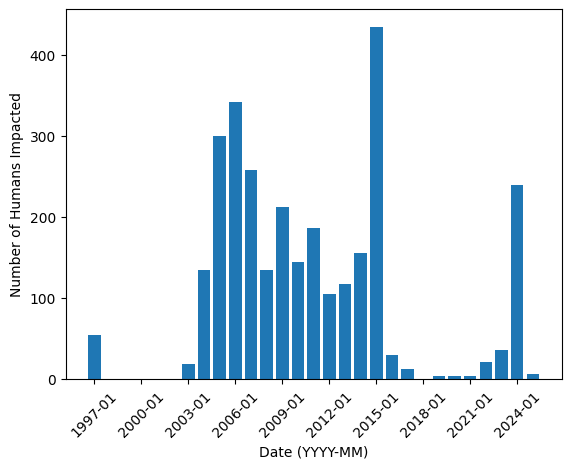

In [ ]:
plt.bar(people_impacted['yyyy_mm'], people_impacted['People_Count'])
tick_positions = people_impacted['yyyy_mm'][::3]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Humans Impacted')
plt.show()

# Data Preprocessing - Historical Weather Data (Aakash)

In [ ]:
#import pandas as pd
#import functools as ft

#dataWA = pd.read_csv('open-meteo-seattle.csv').iloc[2:, 0:2].rename(columns={'latitude':'date', 'longitude':'tempWA'})
#dataIN = pd.read_csv('open-meteo-indiana.csv').iloc[2:, 0:2].rename(columns={'latitude':'date', 'longitude':'tempIN'})
#dataMO = pd.read_csv('open-meteo-missouri.csv').iloc[2:, 0:2].rename(columns={'latitude':'date', 'longitude':'tempMO'})
#dataWI = pd.read_csv('open-meteo-wisconsin.csv').iloc[2:, 0:2].rename(columns={'latitude':'date', 'longitude':'tempWI'})

#data = ft.reduce(lambda left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), [dataWA, dataIN, dataMO, dataWI])

#print(data)

In [ ]:
#data['month'] = data['date'].str[:7]

#print(data)